In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
import os

In [2]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

C:\Users\anshu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
uninfected = glob.glob("input/Uninfected/*.png")
infected = glob.glob("input/Parasitized/*.png")
uninfected_imgs = [(cv2.imread(i, 0)) for i in uninfected]
infected_imgs = [(cv2.imread(i, 0)) for i in infected]
uninfected_imgs = [cv2.resize(i, (50, 50), interpolation = cv2.INTER_AREA).reshape(50, 50, 1) for i in uninfected_imgs]
uninfected_imgs = np.array(uninfected_imgs)
infected_imgs= [cv2.resize(i, (50, 50), interpolation = cv2.INTER_AREA).reshape(50, 50, 1) for i in infected_imgs]
infected_imgs = np.array(infected_imgs)

In [4]:
a = [[i,np.array([0])] for i in uninfected_imgs]
a += [[i,np.array([1])] for i in infected_imgs]
a = np.array(a)

In [5]:
for i in range(25):
    np.random.shuffle(a)

In [6]:
X = np.array([i[0] for i in a])
Y = np.array([i[1] for i in a])
Y = Y.reshape(27558,)

In [7]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2)

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [9]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

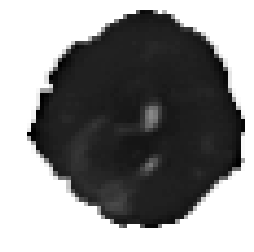

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math

cell = infected_imgs[500]
cell_image = cell.reshape(infected_imgs[500].shape[0], infected_imgs[500].shape[1])

plt.imshow(cell_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

Text(0.5,1,'Cell : 0')

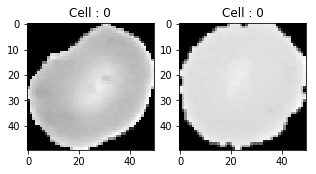

In [11]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:, 0], cmap='gray')
plt.title("Cell : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:, 0], cmap='gray')
plt.title("Cell : {}".format(test_Y[0]))

In [12]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2)

In [13]:
batch_size = 64
epochs = 20
num_classes = 2

In [14]:
malaria_model = Sequential()
malaria_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (50, 50, 1), padding = 'same'))
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(MaxPooling2D((2,2), padding = 'same'))
malaria_model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
malaria_model.add(Dropout(0.25))
malaria_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
malaria_model.add(Dropout(0.25))
malaria_model.add(Flatten())
malaria_model.add(Dense(128, activation = 'linear'))
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(Dropout(0.3))
malaria_model.add(Dense(num_classes, activation = 'softmax'))

In [15]:
malaria_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
malaria_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
__________

In [16]:
malaria_train = malaria_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))

Train on 17636 samples, validate on 4410 samples
Epoch 1/20
17636/17636 [==============================] - 83s 5ms/step - loss: 0.6647 - acc: 0.5942 - val_loss: 0.6808 - val_acc: 0.5778
Epoch 2/20
17636/17636 [==============================] - 80s 5ms/step - loss: 0.4428 - acc: 0.7815 - val_loss: 0.2606 - val_acc: 0.8937
Epoch 3/20
17636/17636 [==============================] - 79s 4ms/step - loss: 0.2205 - acc: 0.9145 - val_loss: 0.2143 - val_acc: 0.9127
Epoch 4/20
17636/17636 [==============================] - 81s 5ms/step - loss: 0.1739 - acc: 0.9342 - val_loss: 0.1665 - val_acc: 0.9367
Epoch 5/20
17636/17636 [==============================] - 80s 5ms/step - loss: 0.1640 - acc: 0.9400 - val_loss: 0.1691 - val_acc: 0.9388
Epoch 6/20
17636/17636 [==============================] - 76s 4ms/step - loss: 0.1459 - acc: 0.9472 - val_loss: 0.1575 - val_acc: 0.9404
Epoch 7/20
17636/17636 [==============================] - 75s 4ms/step - loss: 0.1362 - acc: 0.9480 - val_loss: 0.1440 - val_acc:

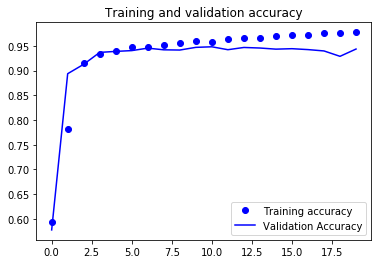

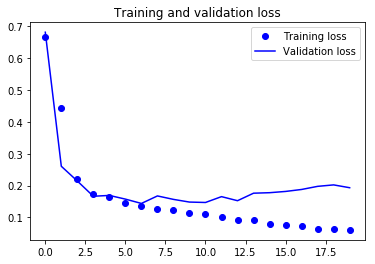

In [17]:
accuracy = malaria_train.history['acc']
val_accuracy = malaria_train.history['val_acc']
loss = malaria_train.history['loss']
val_loss = malaria_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
y_score_train = malaria_model.predict_classes(train_X)
y_score_validate = malaria_model.predict_classes(valid_X)
y_score_test = malaria_model.predict_classes(test_X)

In [19]:
train_label_score = train_label[:, 1]
print(train_label_score.shape)
valid_label_score = valid_label[:, 1]
print(valid_label_score.shape)
test_label_score = test_Y_one_hot[:, 1]
print(test_label_score.shape)

(17636,)
(4410,)
(5512,)


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
train_accuracy = accuracy_score(train_label_score, y_score_train)
print('Training Accuracy: %f' %train_accuracy)
train_precision = precision_score(train_label_score, y_score_train)
print('Training Precision: %f' %train_precision)
train_recall = recall_score(train_label_score, y_score_train)
print('Training Recall: %f' %train_recall)
validation_accuracy = accuracy_score(valid_label_score, y_score_validate)
print('Validation accuracy: %f' %validation_accuracy)
validation_precision = precision_score(valid_label_score, y_score_validate)
print('Validation precision: %f' %validation_precision)
validation_recall = recall_score(valid_label_score, y_score_validate)
print('Validation recall: %f' %validation_recall)
test_accuracy = accuracy_score(test_label_score, y_score_test)
print('Test accuracy: %f' %test_accuracy)
test_precision = precision_score(test_label_score, y_score_test)
print('Test precision: %f' %test_precision)
test_recall = recall_score(test_label_score, y_score_test)
print('Test recall: %f' %test_recall)

Training Accuracy: 0.993479
Training Precision: 0.996272
Training Recall: 0.990787
Validation accuracy: 0.943537
Validation precision: 0.956710
Validation recall: 0.925978
Test accuracy: 0.949383
Test precision: 0.961249
Test recall: 0.935555
